<a href="https://colab.research.google.com/github/sisomimoctrl/study-tensorflow/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [2]:
from tensorflow.keras.datasets import mnist

(train_data, train_targets), (test_data, test_targets) = mnist.load_data()

In [3]:
print(train_data.shape, test_data.shape)
print(type(train_data), type(test_data))
print(type(train_data[0]), type(test_data[0]))

(60000, 28, 28) (10000, 28, 28)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
X_train = train_data.reshape(-1, 28, 28, 1) / 255
X_test = test_data.reshape(-1, 28, 28, 1) / 255

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
print(train_targets.shape, test_targets.shape)
print(type(train_targets))
print('train_targets : ', train_targets)

(60000,) (10000,)
<class 'numpy.ndarray'>
train_targets :  [5 0 4 ... 5 6 8]


In [6]:
y_train = train_targets
y_test = test_targets

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [8]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, 
                    y_train,
                    epochs=20,
                    batch_size=512, 
                    validation_split=0.2)

Epoch 1/20
94/94 [==============================] - 7s 20ms/step - loss: 0.6272 - accuracy: 0.8030 - val_loss: 0.3418 - val_accuracy: 0.8908
Epoch 2/20
94/94 [==============================] - 1s 13ms/step - loss: 0.1617 - accuracy: 0.9517 - val_loss: 0.0937 - val_accuracy: 0.9749
Epoch 3/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0897 - accuracy: 0.9718 - val_loss: 0.0626 - val_accuracy: 0.9822
Epoch 4/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.0620 - val_accuracy: 0.9823
Epoch 5/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0472 - accuracy: 0.9850 - val_loss: 0.0470 - val_accuracy: 0.9866
Epoch 6/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.0603 - val_accuracy: 0.9829
Epoch 7/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0416 - val_accuracy: 0.9889
Epoch 8/20
94

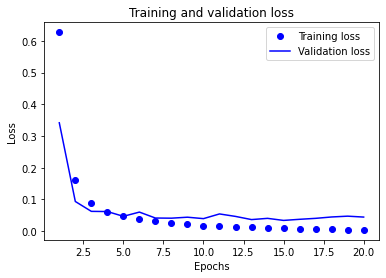

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

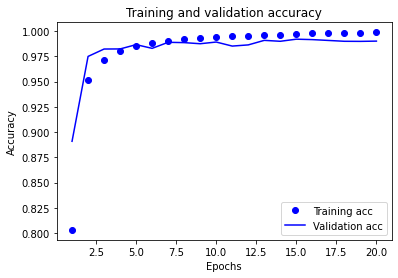

In [11]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]} : {scores[1]*100:.2f} %')

313/313 [==============================] - 1s 3ms/step - loss: 0.0317 - accuracy: 0.9920
accuracy : 99.20 %
